# VW05p_Enrichement

## Tóm tắt

Cho ma trận $m * n (m * n  <= 10^{6})$, tìm ma trận con $3 * 3$ sao cho có tổng nhỏ nhất

## Ý tưởng

Brute force: duyệt tất cả các ô [i, j], tìm tổng của các ma trận 3 * 3 có ô trái trên là [i, j] và ô phải dưới là [i + 2, j + 2] rồi lấy tổng nhất nhỏ là kết quả. ĐPT: $O(mn)$

## Code

In [ ]:
n, m = map(int, input().split())

a = []

for i in range(0, n):
    tmp = list(map(int, input().split()))
    a.append(tmp)

res = 1e6
for i in range(0, n - 2):
    for j in range(0, m - 2):
        curSum = 0
        for u in range(i, i + 3):
            for v in range(j, j + 3):
                curSum += a[u][v]
        res = min(res, curSum)

print(res)

# VW04p_Checkout

## Tóm tắt

Cho $d, a_1, a_2, v_{max}, t_{min}$, tìm thời gian nhỏ nhất từ lúc vận tốc 0, tăng tốc lên v với gia tốc $a_1$, duy trì vận tốc này trong thời gian ít nhất $t_{min}$, giảm dần vận tốc về 0 với tổng quãng đường đi được là $d$.

## Ý tưởng

Chia quãng đường d thành 3 đoạn s1, s2, s3 với s1 là từ lúc vận tốc bằng 0 đến lúc vận tốc là v với gia tốc là a1, s2 là quãng đường vận tốc giữ nguyên là v, s3 là quãng đường từ lúc vận tốc v giảm dần về 0 với gia tốc là a2.

Ta sẽ tham lam (greedy), cho thời gian trong quãng đường s2 là $t_{min}$, sau đó tìm vận tốc v, từ vận tốc v tìm được, ta tính thời gian cho 2 quãng đường s1, s3 rồi có được kết quả.

Trong trường hợp v tìm được lớn hơn $v_{max}$, ta sẽ làm ngược lại, cho vận tốc chạy trong quãng đường s2 là $v_{max}$, rồi tính thời gian trong các quãng đường s1, s2, s3.
Các công thức vật lý được dùng: $$v = \frac{s}{t}$$
$$v = v_0 + at$$
$$s = v_0t + \frac{1}{2}at^2$$
$$v^2 - v_0^2 = 2as$$

Trường hợp tìm $v$ theo $t_{min}$, ta có phương trình (đặt $t = t_{min}$):
$$s_1 + s_2 + s_3 = d$$
$$\Leftrightarrow \frac{v^2}{2a_1} + vt + \frac{v^2}{2a_2} = d$$
$$\Leftrightarrow v^2(\frac{1}{2a_1} + \frac{1}{2a_2}) + vt - d = 0$$
Giải phương trình bậc 2, ẩn $v$, tìm nghiệm $v$ dương, với 3 hệ số của phương trình là $\frac{1}{2a_1} + \frac{1}{2a_2}, t, -d$, đặt $a = \frac{1}{2a_1} + \frac{1}{2a_2}$, ta được: 
$$v = \frac{-t + \sqrt{t^2 + 4ad}}{2a} $$
là vận tốc cần tìm.

Thời gian chạy trong quãng đường s1 là: $t_1=\frac{v}{a_1}$.
Thời gian chạy trong quãng đường s3 là: $t_3=\frac{v}{a_2}$.
Kết quả cần tìm là : $t_1 + t_{min} + t_3$.

Trường hợp $v$ tìm được lớn hơn $v_{max}$:
Thời gian chạy trong quãng đường s1 là: $t_1 = \frac{v_{max}}{a_1}$.
Thời gian chạy trong quãng đường s3 là: $t_3 = \frac{v_{max}}{a_2}$.
Quãng đường s2: $s_2 = d - \frac{v_{max}^2}{2a_1} - \frac{v_{max}^2}{2a_2}$.
Thời gian chạy trong quãng đường s2 là: $t_2 = \frac{s_2}{v_{max}} = \frac{d}{v_{max}} - \frac{v_{max}}{2a_1} - \frac{v_{max}}{2a_2}$.
Kết quả cần tìm là: $t_1 + t_2 + t_3$.

## Code

In [ ]:
import math

d, a1, a2, v_max, t_min = map(float, input().split())

a = float(1) / (a1 * 2) + float(1) / (a2 * 2)
v = (-t_min + math.sqrt(t_min * t_min + a * d * 4)) / (a * 2)

if v <= v_max:
    res = v / a1 + v / a2 + t_min
else:
    res = v_max / a1 + v_max / a2 + (d / v_max - v_max / (a1 * 2) - v_max / (a2 * 2))

print(round(res, 12))

# VW07p_Vitamin

## Tóm tắt

Cho x và dãy n phần tử a[1 : n]. Tìm các chỉ số $i_1, i_2,..., i_k$ sao cho tổng $s[i_1] + s[i_2] + ... + s[i_k] = x$ và tổng $s' = i_1 + i_2 + ... + i_k + (k - 1)$ là nhỏ nhất với $s[i] = a[1] + a[2] + ... + a[i]$, trường hợp $i = n$ thì có thể cho $s[i] = a[1] + a[2} + ... + a[n] * j$ khi đó tổng $s'$ được cộng thêm một lượng $j - 1$. Ràng buộc: $1 \leq n \leq 100, 1 \leq x \leq 10^6, 1 \leq a_i \leq 1000, i = 1 \div n$.

## Ý tưởng

Gọi $f[t]$ tổng $s'$ nhỏ nhất sao cho $t = s[i_1] + s[i_2] + ... + s[i_k]$ với $s'$ và $t$ có các trường hợp như trên.
Ta có:
$f[0] = -1$ để kết quả được đồng bộ với công thức.
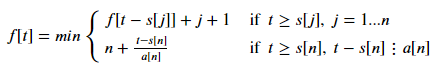

Khởi tạo $f[t]$ với giá trị vô cùng, nếu sau khi tính toán, $f[x] = \infty$ thì xuất kết quả là -1.
Kết quả bài toán: $f[x]$.
ĐPT: $O(n*x)$

## Code

In [ ]:
n, x = map(int, input().split())
a = list(map(int, input().split()))
a = [0] + a
s = []
s.append(0)
for i in range(1, n + 1):
    s.append(s[i - 1] + a[i])

INF = int(1e9)
f = [INF] * (x + 1)
f[0] = -1

for i in range(1, x + 1):
    if ((i - s[n] >= 0) and (i - s[n]) % a[n] == 0):
        f[i] = min(f[i], n + (i - s[n]) // a[n])
    for j in range(1, n + 1):
        if (i - s[j] >= 0):
            f[i] = min(f[i], f[i - s[j]] + j + 1)

if f[x] == INF:
    print(-1)
else:
    print(f[x])